In [20]:
# 1. Use Feature Importance (Random Forest) to rank variables
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, SelectKBest, f_classif
import matplotlib.pyplot as plt

df = pd.read_csv("../data/heart_disease_preprocessed.csv")
X = df.drop('num', axis=1)
y = df['num']

# Random Forest importance
rf = RandomForestClassifier(random_state=42)

rf.fit(X, y)
print("Random Forest complete")
rf_scores = rf.feature_importances_

Random Forest complete


In [21]:
# 2. Apply RFE to select best predictors
rfe = RFE(RandomForestClassifier(random_state=42), n_features_to_select=10)
rfe.fit(X, y)
rfe_scores = rfe.ranking_
print("RFE complete")

RFE complete


In [22]:
# 4. Use F-test for feature significance (simpler than Chi-Square)
f_selector = SelectKBest(f_classif, k=10)
f_selector.fit(X, y)
f_scores = f_selector.scores_
print("F-test complete")

F-test complete


In [23]:
# 4. Select top features from all methods
# Get top 8 features from each method
top_rf = np.argsort(rf_scores)[-8:]
top_rfe = np.where(rfe.ranking_ <= 8)[0]
top_f = np.argsort(f_scores)[-8:]

# Combine and get most common features
all_selected = np.concatenate([top_rf, top_rfe, top_f])
unique, counts = np.unique(all_selected, return_counts=True)
final_indices = unique[counts >= 2]  # Features selected by ≥2 methods

final_features = X.columns[final_indices].tolist()
print(f"Selected {len(final_features)} features: {final_features}")

Selected 11 features: ['age', 'trestbps', 'chol', 'thalach', 'exang', 'oldpeak', 'ca', 'cp_4', 'slope_1', 'thal_3.0', 'thal_7.0']


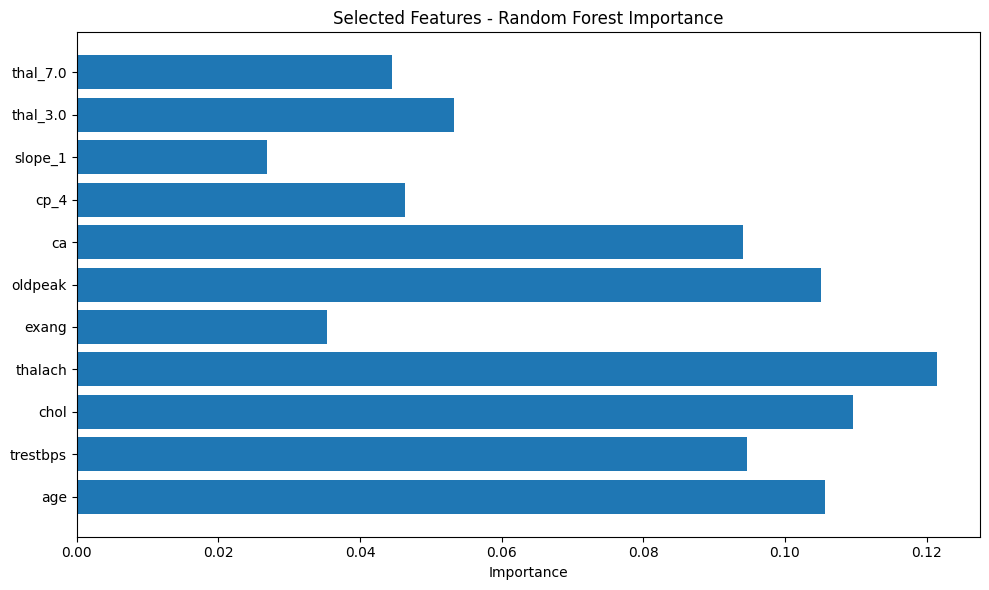

In [24]:
# Feature importance visualization
plt.figure(figsize=(10, 6))
plt.barh(final_features, rf_scores[final_indices])
plt.title('Selected Features - Random Forest Importance')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

In [25]:
# Save selected features dataset
selected_df = df[final_features + ['num']]
selected_df.to_csv("../data/heart_disease_selected_features.csv", index=False)
print(f"Saved dataset with {len(final_features)} selected features")
print(f"Reduced from {X.shape[1]} to {len(final_features)} features")

Saved dataset with 11 selected features
Reduced from 22 to 11 features
